## Topic: 05 - Linear Regression and Train/Test Split challenges
## Date: 10/15/2018
## Name: Amine Naouas

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [2]:
with open("main_df_rentals_reg.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

** Challenge1 **

In [3]:
df['const']=1.

In [4]:
def l_regression(df,outcome,features,intercept):
    X=df.loc[:,features]
    if len(features)<2:
        X=X.values.reshape(-1,1)
    y=df[outcome]
#     X_y=pd.concat([X,y],axis=1)
    lm = LinearRegression(fit_intercept=intercept)
    lm.fit(X, y)
    print(list(zip(features,lm.coef_)))
    plt.figure(1)
    plt.scatter(lm.predict(X), y)
    plt.show()
    plt.figure(2)
    sns.distplot(y-lm.predict(X))
    plt.show()


[('const', 1854.2822477650077)]


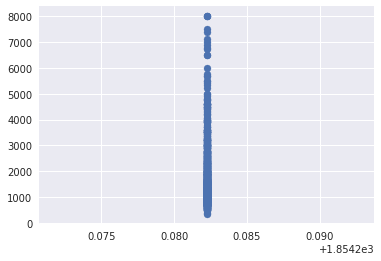

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


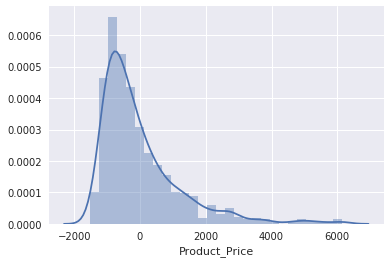

In [5]:
l_regression(df,'Product_Price',['const'], False)

The model predicts the average rent (1,854 euros) for each observation. 

The residuals distribution is not symmetric. The mode is different from the mean (0).

** Challenge 2 **

I add the flat size which is a continuous variable

In [6]:
features=['const','Product_Surface']

[('const', 269.9598379848615), ('Product_Surface', 27.73051183319223)]


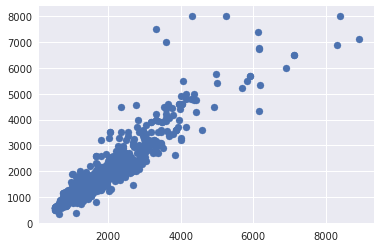

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


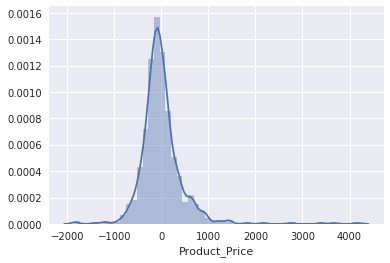

In [7]:
l_regression(df,'Product_Price',features, False)

Now we have rent= a+ surface * b + u  
We have a linear relationship between the surface and the rent : the slope is b=27.73 and the intercept is a=269.96.

The residuals seem to have a less skewed distribution now.

** Challenge 3 **

I transformed the zipcode variable to 20 districts dummies. I add all the dummies excpet one (the 16th district).

In [8]:
features=['const','01', '02', '03','04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15','17', '18', '19', '20']

[('const', 2486.4594594594596), ('01', -519.7671517671524), ('02', -499.01501501501554), ('03', -964.2451737451705), ('04', -722.8440748440755), ('05', -458.4594594594628), ('06', -272.7837837837817), ('07', 155.25482625482857), ('08', 675.8014101057563), ('09', -953.7719594594611), ('10', -1249.2776412776486), ('11', -957.8404118404158), ('12', -993.2094594594583), ('13', -1239.155111633379), ('14', -1110.734459459456), ('15', -725.3771065182818), ('17', -549.4457608293196), ('18', -1176.225416906264), ('19', -1308.1261261261227), ('20', -1388.6927927927907)]


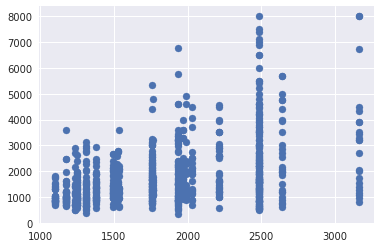

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


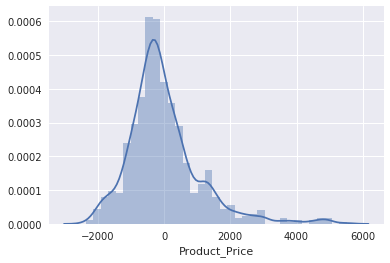

In [9]:
l_regression(df,'Product_Price',features,False)

The intercpet corresponds to the average rent in the 16th district. The coefficient of each district i corresponds to the difference between the average rent in the reference district (16th) and the average rent in the ith district.  
The model will predict the average rent in the district for each observation.

** Challenge 4 **

In [10]:
features=['Product_Surface','Product_RoomCount', 'floors','fournished', 'bathrooms', 'outdoor', 'basement',\
'parking', 'lift','doorman', 'intercom', \
'heating_collective','heating_indiv_gaz', 'year_1946_1970','year_more_1970', \
'01', '02', '03','04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15','17', '18', '19', '20',\
'bathrooms_2', 'bathrooms_3']

[('Product_Surface', 24.639663389493965), ('Product_RoomCount', 52.318220015764965), ('floors', 8.581019262207462), ('fournished', 222.02341717775428), ('bathrooms', 156.65714004314293), ('outdoor', 91.19272476186005), ('basement', -26.817360117868372), ('parking', 55.3364727969632), ('lift', -22.916615976169908), ('doorman', 77.65657105662048), ('intercom', 16.87351195693241), ('heating_collective', 4.38356212235367), ('heating_indiv_gaz', -88.39759565999054), ('year_1946_1970', -143.11531067343512), ('year_more_1970', -183.7026259759233), ('01', 46.82903267565044), ('02', 39.48546494840578), ('03', 14.458005327638084), ('04', 180.56475523574844), ('05', 47.146157588562), ('06', 317.51455362187335), ('07', 98.81137195518914), ('08', 179.94883210125477), ('09', 20.203458549440032), ('10', -119.01137996654515), ('11', -192.34298479839742), ('12', -90.04818617028918), ('13', -258.54277474007057), ('14', -173.74509892897655), ('15', -146.7118577883191), ('17', -43.515853300386304), ('18',

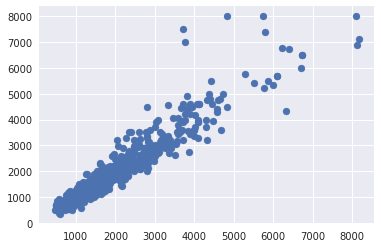

/home/amine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


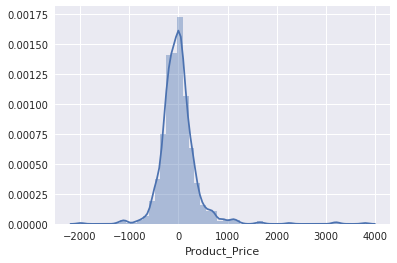

In [11]:
l_regression(df,'Product_Price',features,True)

** Challenge 5 **

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Product_Price'], test_size=0.25, random_state=42)

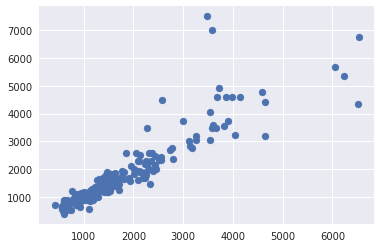

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)
plt.scatter(lm.predict(X_test), y_test)